In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('gasoline.csv')

df.head()

,Date,price
0,2015-09/1,1520.7
1,2015-09/2,1515.1
2,2015-09/3,1512.3
3,2015-09/4,1507.9
4,2015-09/5,1504.7


In [3]:
df.describe()

,price
count,367.000000
mean,1525.662943
std,162.149979
min,1248.900000
25%,1423.500000
50%,1505.300000
75%,1573.200000
max,2137.700000


In [4]:
df = df.rename(columns={'Date' : 'ds', 'price' : 'y'})
df.head

<bound method NDFrame.head of             ds       y
0    2015-09/1  1520.7
1    2015-09/2  1515.1
2    2015-09/3  1512.3
3    2015-09/4  1507.9
4    2015-09/5  1504.7
..         ...     ...
362  2022-08/2  1833.2
363  2022-08/3  1780.2
364  2022-08/4  1743.8
365  2022-08/5  1740.3
366  2022-09/1  1741.2

[367 rows x 2 columns]>

<AxesSubplot:xlabel='ds'>

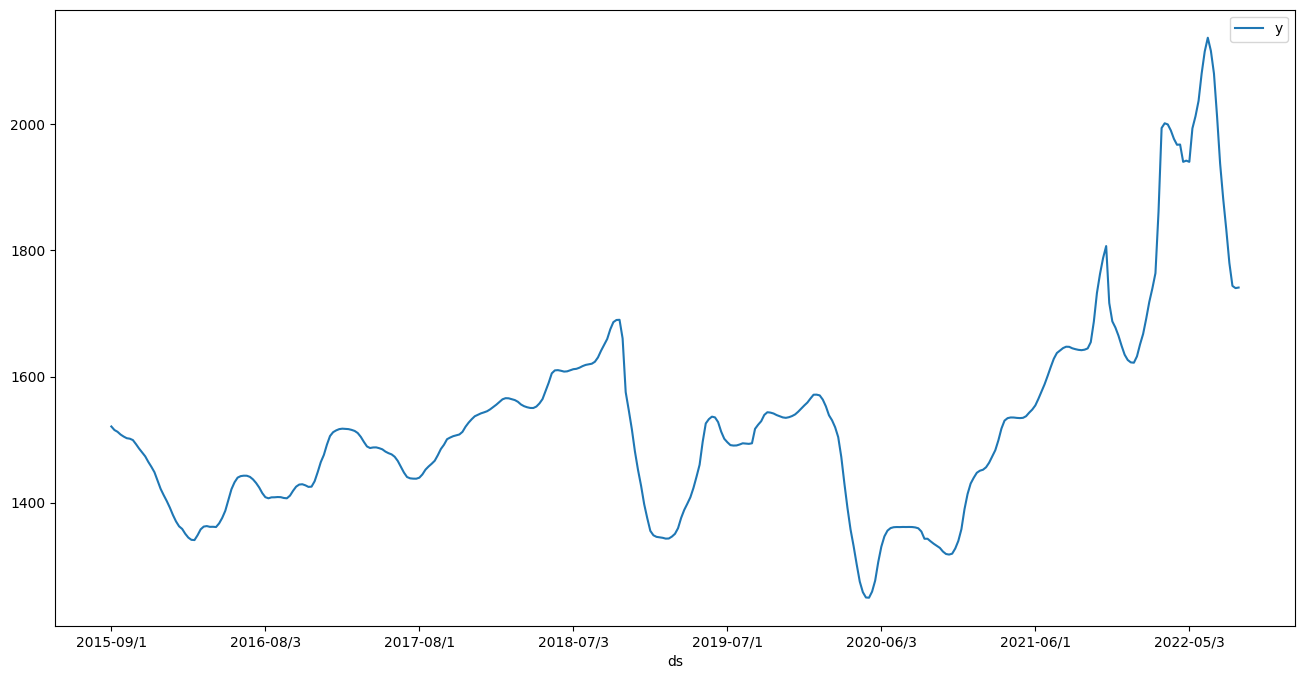

In [5]:
df.plot(x='ds', y='y', figsize=(16,8))

In [6]:
model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.24115


/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1004.67    0.00138763        69.839           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       1008.01   0.000498458       214.845   2.141e-06       0.001      231  LS failed, Hessian reset 
     199       1010.66    0.00158894       72.6613           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1011.7   0.000118602       65.5773     0.08981           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       1011.74   0.000239274       97.5566   3.068e-06       0.001      475  LS failed, Hessian reset 
     399        1011.8   3.29012e-05       63.8768     0.07984     0.07984      565   
    Iter      log prob        ||dx||      ||grad||       alpha

In [7]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail(n=670)
forecast.tail()
forecast.to_csv('gasoline_result.csv')
b = pd.read_csv('gasoline_result.csv')
c = (b[['ds','yhat',]])

c.to_csv('2.csv')



/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


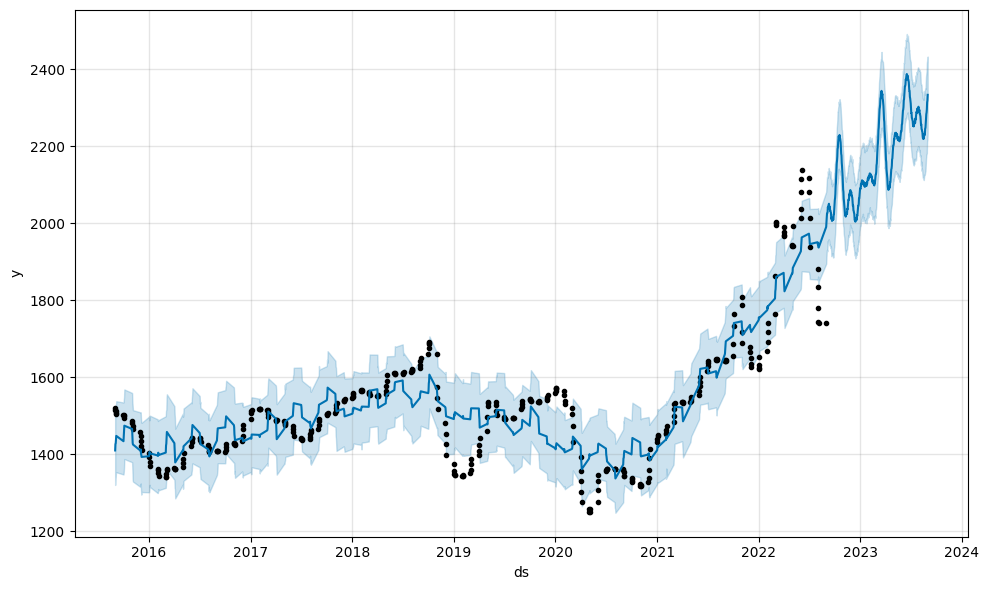

In [8]:
fig1 = model.plot(forecast)